# Milestones 2 Phase 1

# i. Perkenalan

> Bab ini berisi identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

## Identitas

Nama  : **Fadya Ulya Salsabila**

Batch : **RMT-018**

## Background

Hepatitis C adalah penyakit yang sangat berbahaya dan menular, yang disebabkan oleh virus Hepatitis C (HCV). Penularan Hepatitis C dapat melalui cairan tubuh, darah, atau ketika berhubungan seksual dengan penderita. Biasanya, gejala Hepatitis C ini tidak terlihat, sehingga tiba-tiba penderita atau pasien sudah mengalami tahapan kronis hepatitis. Hepatitis C juga dapat memicu timbulnya fibrosis yang menyebabkan sirosis dan kanker hati.

Oleh karena itu, Rumah Sakit Liver harus memiliki fasilitas dan penanganan yang memadai untuk menangani pasien yang terindikasi dan bergejala Hepatitis C. Tujuan dari analisis dan modeling klasifikasi data ini adalah untuk mengetahui apa saja diagnosis pada pasien agar mendapat penanganan lebih lanjut, bisa sembuh, dan meminimalisir kematian. Modeling ini menggunakan 4 algoritma Machine Learning (Supervised), yaitu Logistic Regression, Support Vector Machine, Random Forest, dan Gradient Boosting untuk mendapatkan prediksi terbaik dengan hyperparameter tuning.

## Gambaran Dataset

Dataset adalah tabel `HepatitisCdata` yang diambil dari `Kaggle` (https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset?datasetId=1051216&sortBy=voteCount). Dataset ini memiliki 14 kolom, sebagai berikut:
1. `Unnamed: 0`: nomor urut pasien.
2. `Category`: diagnosis (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis').
3. `Age`: umur dalam tahun.
4. `Sex`: jenis kelamin (f: perempuan, m: laki-laki).
5. `ALB`: Albumin Blood Test (kadar albumin dalam darah). Albumin adalah salah satu protein yang dibuat di hati. Tubuh membutuhkan protein ini untuk melawan infeksi dan melakukan fungsi lainnya.
6. `ALP`: Alkaline phosphatase merupakan enzim yang ditemukan di hati dan tulang dan penting untuk memecah protein. Tingkat ALP yang lebih tinggi dari normal dapat mengindikasikan kerusakan atau penyakit hati, seperti saluran empedu yang tersumbat, atau penyakit tulang tertentu.
7. `ALT`: Alanine Transaminase merupakan enzim yang ditemukan di hati yang membantu mengubah protein menjadi energi untuk sel-sel hati. Saat hati rusak, ALT dilepaskan ke aliran darah dan kadarnya meningkat.
8. `AST`: Aspartate Transaminase merupakan nzim yang membantu metabolisme asam amino. Seperti ALT, AST biasanya ada dalam darah pada tingkat rendah. Peningkatan kadar AST dapat mengindikasikan kerusakan hati, penyakit, atau kerusakan otot.
9. `BIL`: Bilirubin adalah zat berwarna kuning kecoklatan yang ditemukan di empedu. Jumlah bilirubin bisa meningkat akibat kerusakan pada organ hati atau liver.
10. `CHE`: Acetylcholinesterase. Pengukuran aktivitas enzim cholinesterase serum membantu menilai fungsi sintesis hati. Aktivitas cholinesterase serum menurun pada gangguan fungsi sintesis hati, penyakit hati kronik, dan hipoalbumin karena albumin berperan sebagai protein pengangkut cholinesterase.

11. `CHOL`: Cholesterol. Pada Hepatitis C dikaitkan dengan penurunan kadar kolesterol dan LDL.

12. `CREA`: Creatinine. Peningkatan serum kreatinin adalah temuan laboratorium umum untuk pasien sirosis dan dapat mengindikasikan adanya cedera ginjal akut (AKI) atau penyakit ginjal kronis (CKD).

13. `GGT`: Gamma-Glutamyl Transferase adalah enzim dalam darah. Tingkat yang lebih tinggi dari normal dapat mengindikasikan kerusakan hati atau saluran empedu.

14. `PROT`: Protein. Tingkat albumin dan protein total yang lebih rendah dari normal dapat mengindikasikan kerusakan atau penyakit hati.

Literatur tambahan: https://www.ncbi.nlm.nih.gov/books/NBK430897/, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5718874/, https://ppjp.ulm.ac.id/journal/index.php/jbk/article/download/364/304

## Objective

Tujuan dari analisis dan modeling pada data ini adalah:
1. Mengetahui prediksi diagnosis pasien apakah dapat terkena Hepatitis C atau tidak.
2. Mendapatkan model terbaik dalam klasifikasi untuk memprediksi Hepatitis C. 

## Problem Statement

Berdasarkan tujuan di atas, maka problem statement dari analisis dan modeling pada data ini adalah:

1. Apa saja prediksi diagnosis pada pasien?
2. Bagaimana cara menentukan model terbaik dalam klasifikasi untuk memprediksi Hepatitis C?

# ii. Import Libraries

> Bab ini berisi semua library yang digunakan dalam project.


In [ ]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# For Classification Problems
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

# Evaluate Classification Models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# iii. Data Loading

> Bab ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading berupa menampilkan data dan tipe data, memberi nama baru untuk beberapa kolom, mengecek ukuran dataset, serta melihat missing value.

## Load Data

In [ ]:
# Connect Colab to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data diambil dari Kaggle kemudian dilakukan load (menampilkan) data

data = pd.read_csv('/content/drive/MyDrive/Hacktiv8 - Fadya Ulya/phase 1/HepatitisCdata.csv')
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
# Load 10 data teratas

data.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [ ]:
# Load 10 data terbawah

data.tail(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
605,606,3=Cirrhosis,42,f,33.0,79.0,3.7,55.7,200.0,1.72,5.16,89.1,146.3,69.9
606,607,3=Cirrhosis,49,f,33.0,190.7,1.2,36.3,7.0,6.92,3.82,485.9,112.0,58.5
607,608,3=Cirrhosis,52,f,39.0,37.0,1.3,30.4,21.0,6.33,3.78,158.2,142.5,82.7
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
# Duplicate dataset agar punya backup

df1 = data.copy()

## Info Data dan Missing Value

In [ ]:
# Menampilkan info data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


Berdasarkan hasil info data di atas, kolom `ALP, ALT, CHOL, dan PROT` yang memiliki missing value. Kolom-kolom yang memiliki missing value ini akan didrop karena tidak terlalu banyak.

Sebelumn didrop, berikut akan menampilkan berapa jumlah missing value tiap kolom.

In [ ]:
# Menampilkan missing values

mv = df1.isna().sum() # definisikan missing values dan mencari jumlah tiap kolom
print('\nJumlah missing value per kolom:\n', mv) # print mv


Jumlah missing value per kolom:
 Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


Setelah memastikan jumlah missing value yang berada pada tiap kolom, selanjutnya akan didrop.

In [ ]:
# Drop kolom ALP, ALT, CHOL, dan PROT yang mimiliki missing value

df2 = df1.dropna(subset=['ALP', 'ALT', 'CHOL', 'PROT'])

In [ ]:
# Menampilkan kembali missing values setelah cleaning

mv = df2.isna().sum() # definisikan missing values dan mencari jumlah tiap kolom
print('\nJumlah missing value per kolom:\n', mv) # print mv


Jumlah missing value per kolom:
 Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64


Kolom `ALP, ALT, CHOL, dan PROT` sudah tidak memiliki missing value. Selanjutnya akan dilakukan drop pada kolom `Unnamed: 0`.

In [ ]:
# Drop kolom Unnamed: 0 karena tidak terlalu penting

df2.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# Menampilkan ukuran dataset after cleaning

df2.shape

(589, 13)

Data setelah dilakukan cleaning menjad 589 baris dan 13 kolom yang akan digunakan untuk analisis dan modeling.

## Mapping Target

In [ ]:
# Duplicate data untuk melihat target

df3 = df2.copy()

In [ ]:
# Menampilkan unique value

df3.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
# Mapping numeric values

df3['Category'] = df3['Category'].map({'0=Blood Donor' : 0, '0s=suspect Blood Donor' : 1, 
                                       '1=Hepatitis' : 2, '2=Fibrosis' : 3, '3=Cirrhosis' : 4})

df3.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Kesimpulan Data Loading

1. Data yang digunakan analisis dan modeling adalah `589 baris dan 13 kolom`.
2. Mapping values pada kolom `Category` digunakan untuk memudahkan saat proses EDA dan modeling, sehingga `df2` harus diduplikat menjadi `df3`.
3. Setelah dilakukan data cleaning untuk missing value, data yang akan digunakan sudah tidak memiliki missing value karena didrop.

# iv. Exploratory Data Analysis (EDA)


> Bab ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Informasi Statistik Deskriptif

In [ ]:
# Menampilkan informasi count hingga nilai maksimal pada kolom numerik

df2.loc[:, ['Age', 'ALB',	'ALP', 'ALT',	'AST', 'BIL',	'CHE', 'CHOL', 'CREA', 'GGT',	'PROT']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,589.0,47.417657,9.931334,23.00,39.00,47.00,54.00,77.00
ALB,589.0,41.624278,5.761794,14.90,38.80,41.90,45.10,82.20
ALP,589.0,68.123090,25.921072,11.30,52.50,66.20,79.90,416.60
ALT,589.0,26.575382,20.863120,0.90,16.40,22.70,31.90,325.30
AST,589.0,33.772835,32.866871,10.60,21.50,25.70,31.70,324.00
BIL,589.0,11.018166,17.406572,0.80,5.20,7.10,11.00,209.00
CHE,589.0,8.203633,2.191073,1.42,6.93,8.26,9.57,16.41
CHOL,589.0,5.391341,1.128954,1.43,4.62,5.31,6.08,9.67
CREA,589.0,81.669100,50.696991,8.00,68.00,77.00,89.00,1079.10
GGT,589.0,38.198472,54.302407,4.50,15.60,22.80,37.60,650.90


Informasi statistik deskriptif di atas menunjukkan bahwa pasien paling muda berusia 23 tahun dan pasien paling tua berusia 77 tahun.
Berdasarkan data tersebut, kadar kreatinin memiliki angka maksimal paling tinggi dibanding indikator lainnya. Ini menunjukkan bahwa, ada pasien yang mengalami sirosis hati stadium akut.

Rata-rata kadar protein adalah sebesar 71 dan nilai maksimal 86.5, hal ini berarti mayoritas pasien yang berstatus sehat. Semakin rendah total protein, maka itu adalah indikator pasien tersebut terjangkit Hepatitis.

## Persebaran Data Target Diagnosis

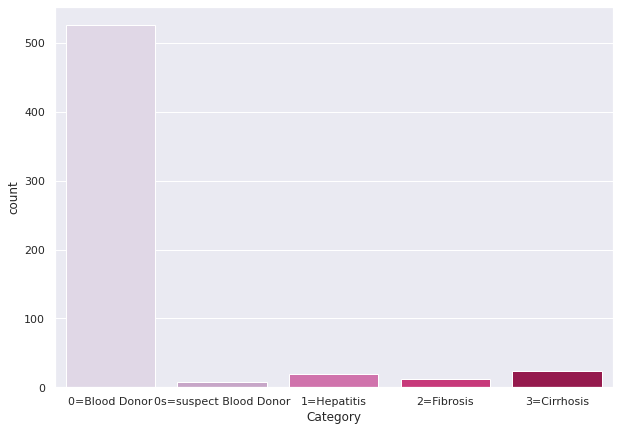

In [ ]:
# Menampilkan visualisasi jumlah dari diagnosis

plt.figure(figsize=(10,7))
ax = sns.countplot(x='Category', data=df2, palette="PuRd")

In [ ]:
# Menghitung kejadian kematian


df2.Category.value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

Visualisasi persebaran jenis diagnosis pada pasien yaitu sebanyak 526 pasien sehat (`Blood Donor`), 24 pasien mengalami hepatitis kronis (sirosis/`Cirrhosis`), 20 pasien mengalami Hepatitis C (`Hepatitis`), 12 pasien masuk dalam hepatitis akut (fibrosis/`Fibrosis`), dan 7 pasien yang terindikasi suspek (`suspect Blood Donor`). 

Dalam data tersebut, mayoritas pasien adalah tak terdiagnosis sakit (sehat) yaitu pada `Blood Donor`.

## Distribusi Usia Pasien dan Gender

In [ ]:
# Menghitung pasien berdasarkan sex

df3.Sex.value_counts()

m    363
f    226
Name: Sex, dtype: int64

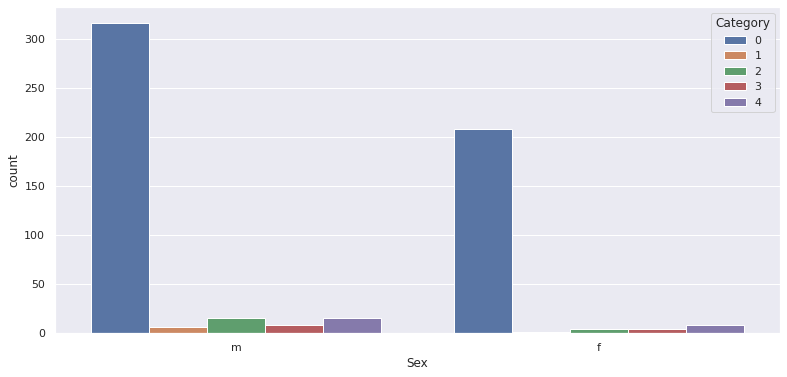

In [ ]:
# Menampilkan visualisasi jumlah gender berdasarkan diagnosis

plt.figure(figsize=(13,6))
ax = sns.countplot(x='Sex', data=df3, hue="Category")

In [ ]:
# Mengelompokkan jenis kelamin pasien berdasarkan diagnosa

sex = df3.groupby(['Sex','Category']).size().reset_index(name='counts')
print(sex)

  Sex  Category  counts
0   f         0     209
1   f         1       1
2   f         2       4
3   f         3       4
4   f         4       8
5   m         0     317
6   m         1       6
7   m         2      16
8   m         3       8
9   m         4      16


Berdasarkan perhitungan dan visualisasi di atas mengenai jenis kelamin pasien, didapatkan bahwa pasien laki-laki mendominasi, yaitu `363 pasien adalah laki-laki dan 226 pasien adalah perempuan`. Pasien laki-laki juga yang paling banyak terdiagnosis Hepatitis C (`2`) yaitu 16 orang, 8 pasien mengalami fibrosis (`3`), dan 16 pasien mengalami sirosis hati (`4`).

In [ ]:
# Mengelompokkan usia menjadi range

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-80']
df2['agerange'] = pd.cut(df2.Age, bins, labels = labels,include_lowest = True)

print(df2)

          Category  Age Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5   7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3  18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7  36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0  30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1  32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...   ...    ...   ...    ...   ...   
608    3=Cirrhosis   58   f  34.0   46.4  15.0  150.0   8.0   6.26  3.98   
609    3=Cirrhosis   59   f  39.0   51.3  19.6  285.8  40.0   5.77  4.51   
610    3=Cirrhosis   62   f  32.0  416.6   5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8   2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3   3.5   99.0  48.0   1.66  3.63   

      CREA    GGT  PROT agerange  
0    106.0   12.1  69.0    30-39  
1     74.0   15.6

In [ ]:
# Mengelompokkan usia pasien berdasarkan diagnosa

age = df2.groupby(['agerange','Category']).size().reset_index(name='counts')
print(age)

   agerange                Category  counts
0     20-29           0=Blood Donor       0
1     20-29  0s=suspect Blood Donor       0
2     20-29             1=Hepatitis       3
3     20-29              2=Fibrosis       1
4     20-29             3=Cirrhosis       0
5     30-39           0=Blood Donor     152
6     30-39  0s=suspect Blood Donor       0
7     30-39             1=Hepatitis       7
8     30-39              2=Fibrosis       3
9     30-39             3=Cirrhosis       1
10    40-49           0=Blood Donor     182
11    40-49  0s=suspect Blood Donor       3
12    40-49             1=Hepatitis       6
13    40-49              2=Fibrosis       2
14    40-49             3=Cirrhosis       6
15    50-59           0=Blood Donor     142
16    50-59  0s=suspect Blood Donor       2
17    50-59             1=Hepatitis       3
18    50-59              2=Fibrosis       4
19    50-59             3=Cirrhosis      12
20    60-69           0=Blood Donor      46
21    60-69  0s=suspect Blood Do

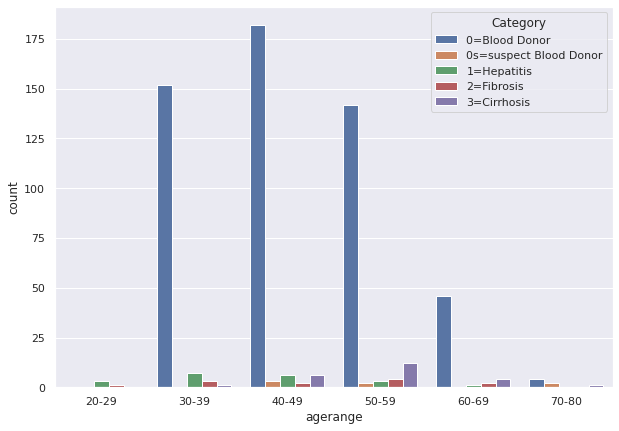

In [ ]:
# Menampilkan visualisasi usia berdasarkan diagnosis

plt.figure(figsize=(10,7))
ax = sns.countplot(x='agerange', data=df2, hue="Category")

Berdasarkan hasil pembuatan range usia di atas, usia para pasien dikelompokkan menjadi 6 kelompok, yaitu `usia 20-29 tahun, 30-39 tahun, 40-49 tahun, 50-59 tahun, 60-69 tahun, dan 70-80 tahun`. Pengelompokkan usia tersebut melihat dari informasi statistik deskriptif bahwa usia pasien termuda adalah 23 tahun dan usia pasien tertua adalah 77 tahun.

Hasil visualisasi dan perhitungan di atas, menunjukkan bahwa pasien paling banyak berumur antara 30-69 tahun. Di mana pasien yang banyak mengalami sirosis hati (`4`) adalah yang berumur 50-59 tahun.

## Hubungan Antar Kolom

<Axes: >

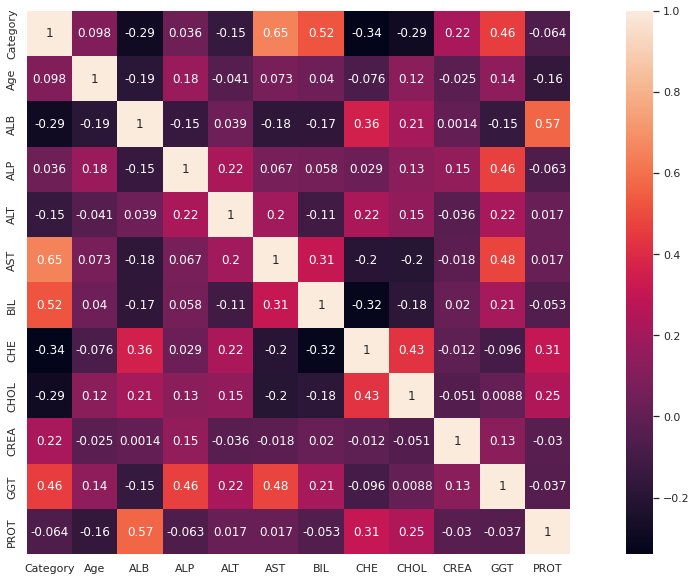

In [ ]:
# Menampilkan korelasi antar kolom menggunakan heatmap correlation

fig = plt.figure(figsize = (20,10))

sns.heatmap(df3.corr(), annot = True, square = True)

Berdasarkan heatmap correlation di atas, kolom `AST, BIL, dan GGT` berhubungan erat dengan diagnosa pasien (`Category`) dengan skor > 45%. Hal ini dibuktikan dengan literatur bahwa, meningkatnya kadar `ALT, BIL, dan GGT` di atas normal, mengindikasikan keparahan kerusakan hati (liver).

Sedangkan, kolom yang berkorelasi negatif dengan diagnosa (`Category`) adalah `CHE` karena semakin rendahnya kadar CHE, makan semakin memperburuk kondisi hati. Mengindikasikan penyakit hepatitis semakin parah.

Oleh karena itu, di bawah ini adalah visualisasi kolom `AST` dengan korelasi positif tertinggi dan `CHE` dengan korelasi negatif berdasarkan diagnosa.

## Visualisasi Category dengan Features Terkait

### AST (Aspartate Transaminase Enzyme)

In [ ]:
# Rata-rata AST berdasarkan diagnosis

AST = df3.groupby('Category').agg({'AST':'mean'}).reset_index()
AST = AST.sort_values(by='AST')
AST

,Category,AST
0,0,26.517871
1,1,71.000000
2,2,81.675000
3,3,88.383333
4,4,114.695833


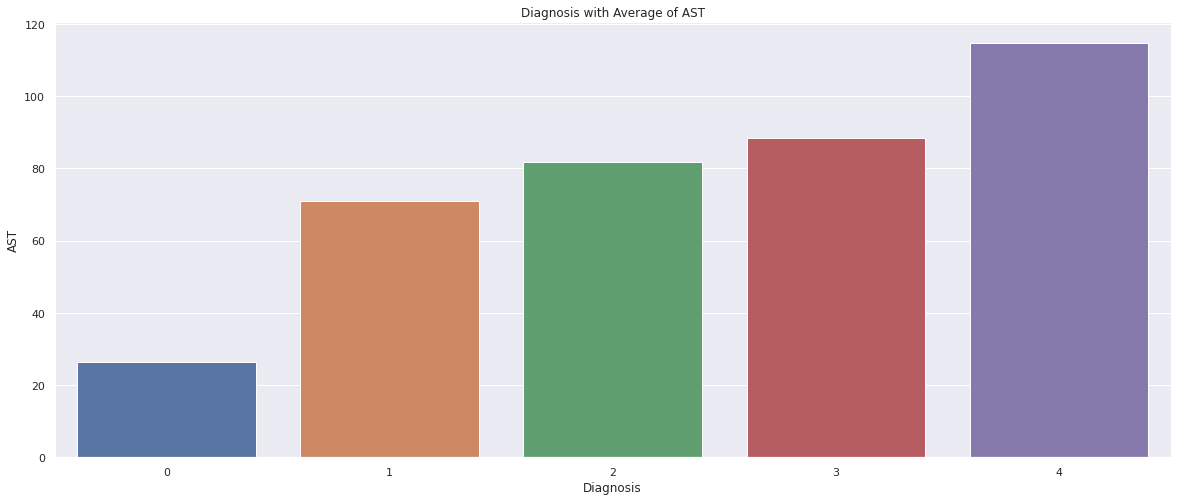

In [ ]:
# Menampilkan visualisasi bar chart

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20, 8))

sns.barplot(data=AST, x=AST.Category, y=AST.AST)

plt.title('Diagnosis with Average of AST')
plt.xlabel('Diagnosis')
plt.ylabel('AST')
plt.show()

Berdasarkan perhitungan rata-rata serta visualisasi kadar `AST` berdasarkan diagnosa (`Category`), menunjukkan bahwa semakin meningkatnya kondisi keparahan liver ditunjukkan dengan naiknya kadar `AST`. Seperti dilihat pada kondisi sirosis hati (`4`) memiliki rata-rata AST sebesar 114.69. Angka ini memiliki selisih yang jauh dengan pasien kondisi sehat (`0`) yang memiliki kadar AST rata-rata yaitu 26.51.

### CHE (Acetylcholinesterase Enzyme)

In [ ]:
# Rata-rata CHE berdasarkan diagnosis

CHE = df3.groupby('Category').agg({'CHE':'mean'}).reset_index()
CHE = CHE.sort_values(by='CHE')
CHE

,Category,CHE
4,4,3.428333
1,1,7.480000
0,0,8.386464
3,3,8.440833
2,2,9.236500


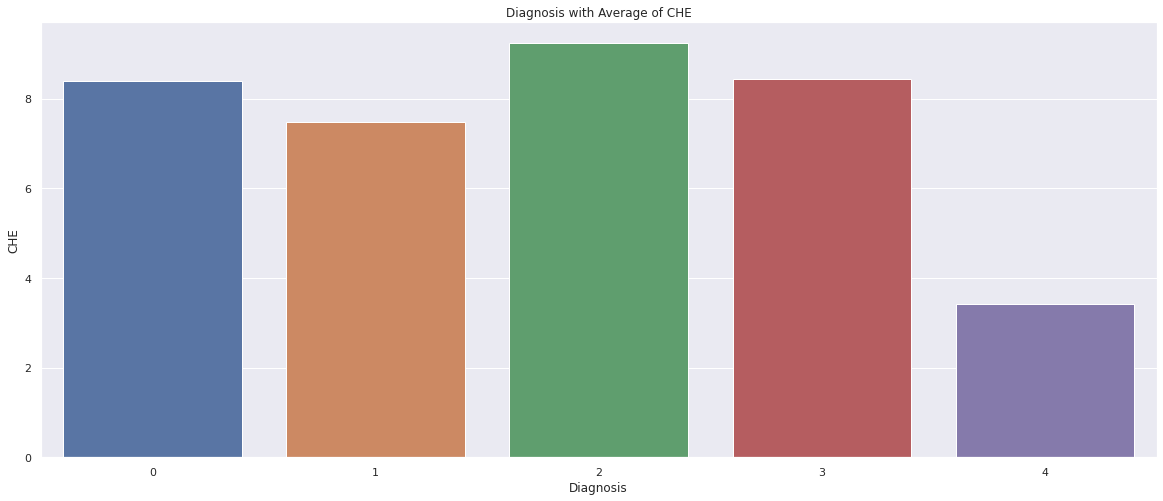

In [ ]:
# Menampilkan visualisasi bar chart

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20, 8))

sns.barplot(data=CHE, x=CHE.Category, y=CHE.CHE)

plt.title('Diagnosis with Average of CHE')
plt.xlabel('Diagnosis')
plt.ylabel('CHE')
plt.show()

Berdasarkan perhitungan rata-rata serta visualisasi kadar `CHE` berdasarkan diagnosa (`Category`), menunjukkan bahwa semakin meningkatnya kondisi keparahan liver ditunjukkan dengan turunnya kadar `CHE`. 

Seperti dilihat pada kondisi sirosis hati (`4`) memiliki rata-rata CHE sebesar 3.42. Namun, kadar CHE ini tidak bisa dilihat sebagai patokan utama dalam menentukan kerusakan hati, karena ada indikator lain yang lebih dapat memengaruhi.

## Kesimpulan EDA

1. Persebaran data target diagnosis menunjukkan bahwa pasien mayoritas terprediksi sehat sebanyak 526 orang, namun terdapat 24 pasien terdiagnosis mengalami sirosis hati (`4`). Kondisi ini sangat berbahaya karena dapat menyebabkan pasien menjadi terkena kanker hati dan meninggal.
2. Pasien di rumah sakit ini mayoritas adalah laki-laki dan berumur di rentang 40-49 tahun. Namun, paling banyak yang mengalami sirosis adalah pasien laki-laki rentang 50-59 tahun.
3. Berdasarkan heatmap correlation, diagnosis berkorelasi positif dengan kadar enzim aspartat transaminase (`AST`), bilirubin (`BIL`), dan enzim Gamma-Glutamyl Transferase (`GGT`). Serta berkorelasi negatif dengan kadar kolinesterase (`CHE`). Kolom-kolom ini sangat berpengaruh terhadap diagnosis pasien.

# v. Data Preprocessing

> Bab ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



## Split antara `X` (features) and `y` (Target)

Berdasarkan EDA, literatur, dan personal judgement, semua features pada dataset ini memiliki hubungan dengan prediksi Hepatitis C. Sehingga semuanya digunakan dalam modeling.

In [ ]:
# Splitting antara `X` dan `y`
# `y` (target) adalah diagnosis

X = df3.drop(['Category'], axis=1) # features
y = df3['Category'] # target
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
608,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
# Melihat data X, baris dan kolom

X.shape

(589, 12)

Features (`X`) yang digunakan adalah sebanyak 589 baris dan 12 kolom.

## Split antara Train-Set dan Test-Set


In [ ]:
# Splitting antara Train-Set dan Test-Set

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size = 0.2, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (471, 12)
Test Size  :  (118, 12)


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
149,46,m,39.7,40.3,14.6,22.3,5.3,6.30,4.66,71.0,11.7,67.2
466,52,f,36.0,47.2,19.6,22.5,5.9,7.85,5.69,85.0,30.4,69.2
503,57,f,37.9,50.3,12.2,18.1,3.5,6.72,5.06,71.0,10.0,69.3
327,33,f,38.2,54.4,17.3,21.2,7.1,8.67,5.69,68.0,32.1,66.9
389,44,f,45.6,57.6,21.0,19.1,3.7,10.36,6.68,74.0,20.8,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...
322,33,f,36.0,77.5,14.8,22.0,4.4,8.61,5.26,66.0,13.1,66.1
93,40,m,44.5,45.7,25.9,27.6,9.2,8.93,4.49,87.0,17.0,71.2
133,44,m,44.0,84.3,47.4,31.3,4.1,10.28,5.42,105.0,34.2,75.3
324,33,f,44.3,74.0,49.7,52.3,8.5,6.49,3.34,73.0,44.7,73.8


Dataset sudah dipisahkan antara `features` dan `target`. Kemudian split antara Train-Set dan Test-Set dan didapatkan data yang digunakan sebagai `Train` adalah 471 baris dan 12 kolom. Sedangkan data `Test` adalah sebanyak 118 baris dan 12 kolom.

Setelah itu, cek apakah ada outliers di `X_train`, `X_test`, `y_train`, dan `y_test`.

## Handling Outlier

Subbab ini dilakukan pengecekan distribusi data apakah terdistribusi normal atau tidak.

### Skewness

Bagian ini bertujuan untuk menampilkan persebaran data pada setiap kolom. Kolom pada dataset yang digunakan semuanya adalah kolom numerik, sehingga semua dilakukan untuk pengecekan distribusi data. Kolom yang ditampilkan distribusinya adalah kolom `'Age', 'ALB',	'ALP', 'ALT',	'AST', 'BIL',	'CHE', 'CHOL', 'CREA', 'GGT',	'PROT'`.

In [ ]:
# Membuat fungsi histogram dan boxplot
# Membuat fungsi dengan mengambil variabel pada dataframe

def diagnostic_plots(data, variable):
    # Mendefinisikan ukuran gambar visualisasi
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

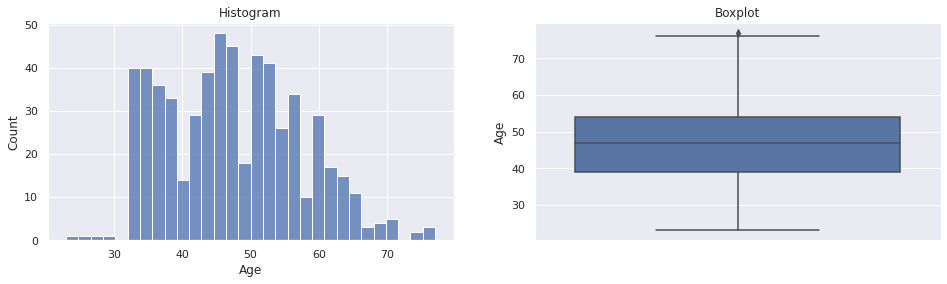


Skewness Value Age :  0.2865584583055867


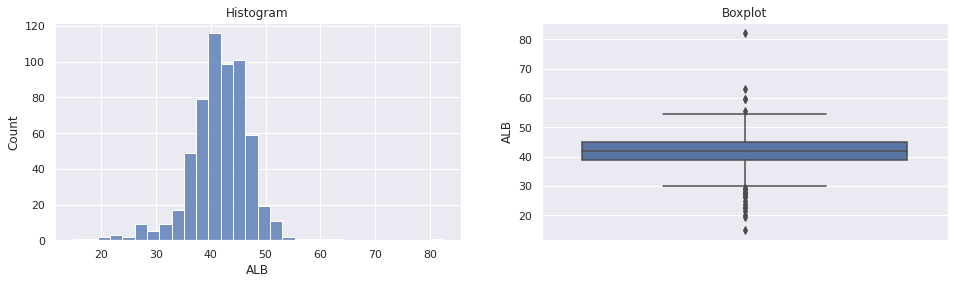


Skewness Value ALB :  -0.10222807721707886


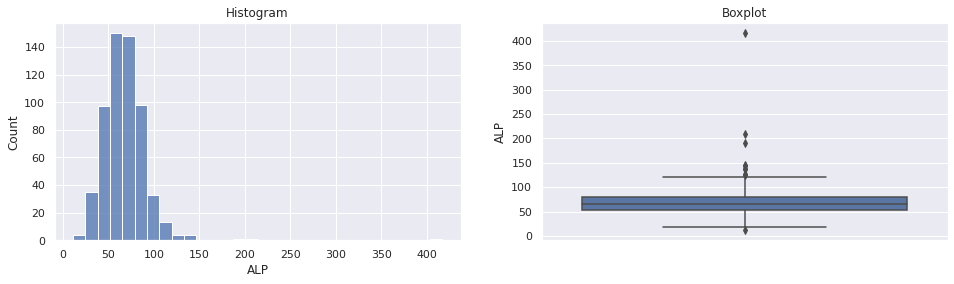


Skewness Value ALP :  4.756844966441788


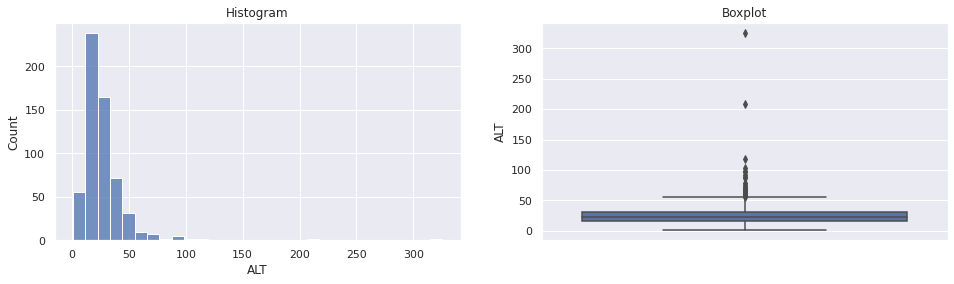


Skewness Value ALT :  6.8159264445551955


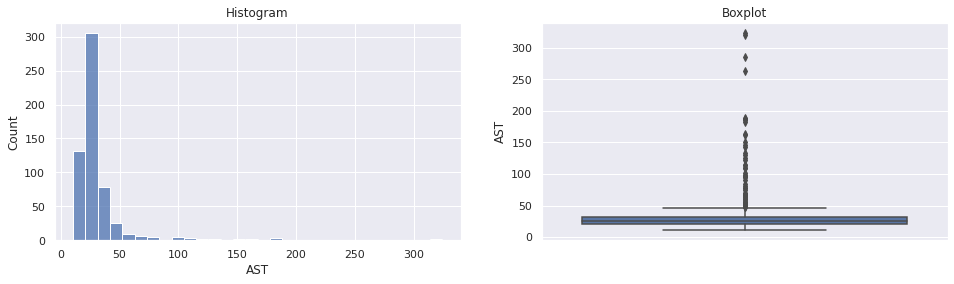


Skewness Value AST :  5.246583032204544


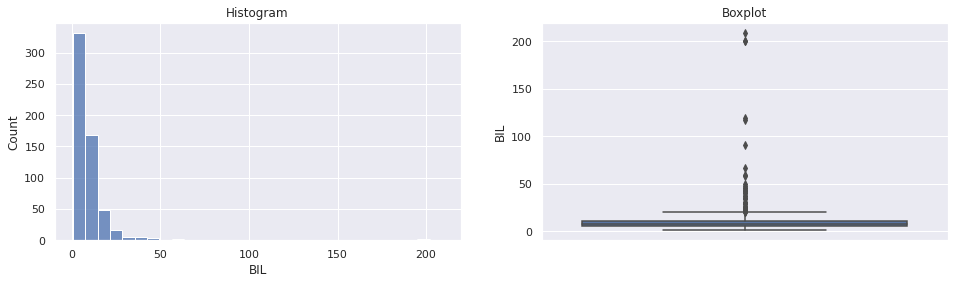


Skewness Value BIL :  8.08930404280566


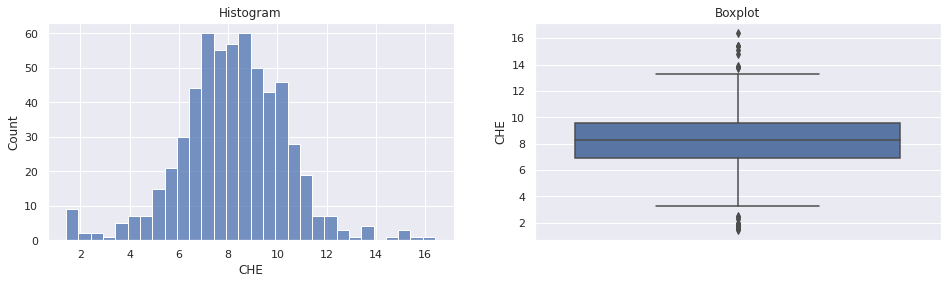


Skewness Value CHE :  -0.06716132903399372


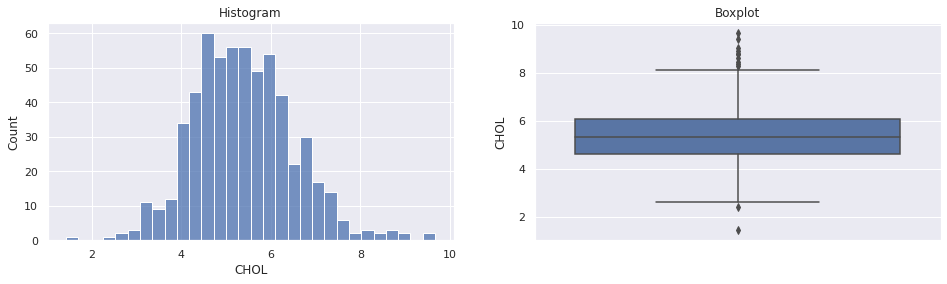


Skewness Value CHOL :  0.3787797362852861


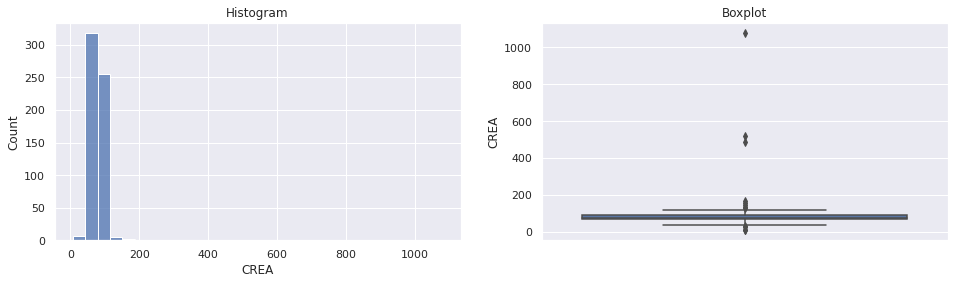


Skewness Value CREA :  14.955189234609138


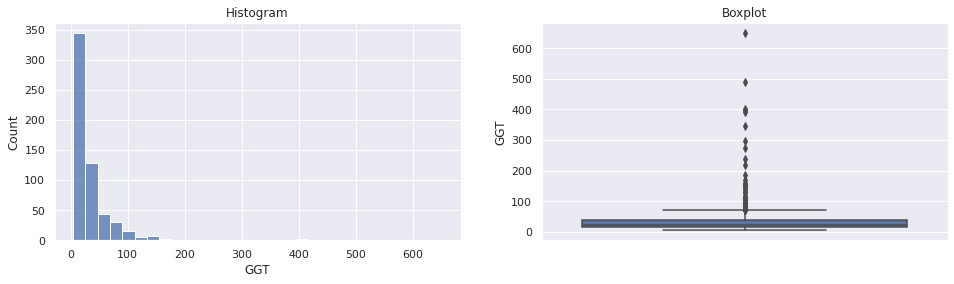


Skewness Value GGT :  5.936909534339234


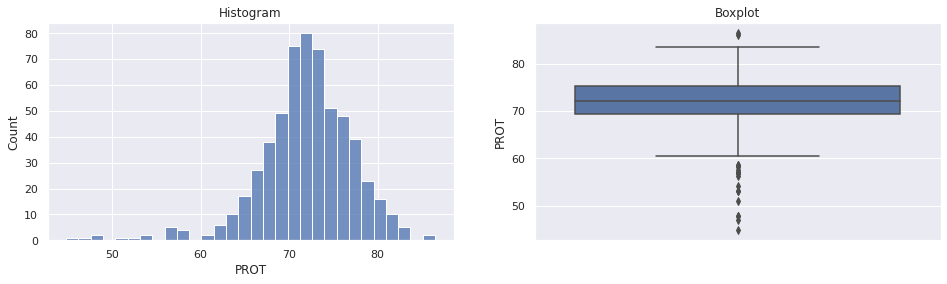


Skewness Value PROT :  -1.0619083136376772


In [ ]:
# Membuat diagram dengan mengambil variabel 
# Umur
diagnostic_plots(df3, 'Age')
print('\nSkewness Value Age : ', df3['Age'].skew())

# Kadar enzim ALB
diagnostic_plots(df3, 'ALB')
print('\nSkewness Value ALB : ', df3['ALB'].skew())

# Kadar enzim ALP
diagnostic_plots(df3, 'ALP')
print('\nSkewness Value ALP : ', df3['ALP'].skew())

# Kadar Enzim ALT
diagnostic_plots(df3, 'ALT')
print('\nSkewness Value ALT : ', df3['ALT'].skew())

# Kadar Enzim AST
diagnostic_plots(df3, 'AST')
print('\nSkewness Value AST : ', df3['AST'].skew())

# Kadar bilirubin
diagnostic_plots(df3, 'BIL')
print('\nSkewness Value BIL : ', df3['BIL'].skew())

# Kadar Enzim CHE
diagnostic_plots(df3, 'CHE')
print('\nSkewness Value CHE : ', df3['CHE'].skew())

# Kadar Kolesterol
diagnostic_plots(df3, 'CHOL')
print('\nSkewness Value CHOL : ', df3['CHOL'].skew())

# Kadar Serum Kreatinin
diagnostic_plots(df3, 'CREA')
print('\nSkewness Value CREA : ', df3['CREA'].skew())

# Kadar Enzim GGT
diagnostic_plots(df3, 'GGT')
print('\nSkewness Value GGT : ', df3['GGT'].skew())

# Kadar Protein
diagnostic_plots(df3, 'PROT')
print('\nSkewness Value PROT : ', df3['PROT'].skew())

### Statement

Berdasarkan hasil distribusi data di atas, skewness value pada masing-masing kolom adalah:
- `Skewness Value Age` :  0.2865584583055867
- `Skewness Value ALB` :  -0.10222807721707886
- `Skewness Value ALP` :  4.756844966441788
- `Skewness Value ALT` :  6.8159264445551955
- `Skewness Value AST` :  5.246583032204544
- `Skewness Value BIL` :  8.08930404280566
- `Skewness Value CHE` :  -0.06716132903399372
- `Skewness Value CHOL` :  0.3787797362852861
- `Skewness Value CREA` :  14.955189234609138
- `Skewness Value GGT` :  5.936909534339234
- `Skewness Value PROT` :  -1.0619083136376772

Data yang terdistribusi normal adalah kolom `age` dan `CHOL`. Sedangkan kolom lain memiliki distribusi tidak normal karena skewness value -0.5< x >0.5. Semua data di atas tidak perlu dilakukan handling karena baik distribusi normal maupun tidak terdistribusi normal masuk ke natural outlier.

Jika dilakukan handling akan menghilangkan suatu data untuk prediksi model sehingga akan berisiko kurang representatif.

### Cardinality

In [ ]:
# Data yang termasuk data kategorikal

cat_col = df3.dtypes[data.dtypes == 'object']
cat_col

Category     int64
Sex         object
dtype: object

In [ ]:
# Cek cardinality, di mana variabel ini memiliki jumlah label yang berbeda dalam kategori yang berbeda

print('Number of categories in the variable Category    : {}'.format(len(df3.Category.unique())))
print('Number of categories in the variable Sex   : {}'.format(len(df3.Sex.unique())))
print('Total number of Patients    : {}'.format(len(df3)))

Number of categories in the variable Category    : 5
Number of categories in the variable Sex   : 2
Total number of Patients    : 589


Pada perhitungan cardinality di atas, semuanya tidak dilakukan handling karena data masing tergolong normal. Tidak ada yang perlu dicut.

## Handling Missing Value

Subbab ini dilakukan pengecekan missing value pada `X_train`, `X_test`, `y_train`, dan `y_test`.

In [ ]:
# Cek missing values di `X_train`

X_train.isnull().sum()

Age     0
Sex     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

In [ ]:
# Cek missing values di `X_test`

X_test.isnull().sum()

Age     0
Sex     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

In [ ]:
# Cek missing values di `y_train`

y_train.isnull().sum()

0

In [ ]:
# Cek missing values di `y_test`

y_test.isnull().sum()

0

Berdasarkan pengecekan missing values di atas, `X_train`, `X_test`, `y_train`, dan `y_test` sudah tidak memiliki missing values.

## Feature Selection

Subbab ini adalah pemilihan features untuk modeling. Karena sudah dilakukan pemilihan feature yang digunakan, maka langsung saja untuk menampilkan data features.

In [ ]:
# Display X_train

X_train

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
149,46,m,39.7,40.3,14.6,22.3,5.3,6.30,4.66,71.0,11.7,67.2
466,52,f,36.0,47.2,19.6,22.5,5.9,7.85,5.69,85.0,30.4,69.2
503,57,f,37.9,50.3,12.2,18.1,3.5,6.72,5.06,71.0,10.0,69.3
327,33,f,38.2,54.4,17.3,21.2,7.1,8.67,5.69,68.0,32.1,66.9
389,44,f,45.6,57.6,21.0,19.1,3.7,10.36,6.68,74.0,20.8,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...
322,33,f,36.0,77.5,14.8,22.0,4.4,8.61,5.26,66.0,13.1,66.1
93,40,m,44.5,45.7,25.9,27.6,9.2,8.93,4.49,87.0,17.0,71.2
133,44,m,44.0,84.3,47.4,31.3,4.1,10.28,5.42,105.0,34.2,75.3
324,33,f,44.3,74.0,49.7,52.3,8.5,6.49,3.34,73.0,44.7,73.8


## Split antara Kolom Numerikal dan Kategorikal

In [ ]:
# Mengetahui Kolom Numerikal and dan Kolom Kategorical

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
Cat Columns :  ['Sex']


In [ ]:
# Split Train-Set dan Test-Set berdasarkan tipe kolom numerikal dan kategorikal

X_train_num = X_train[num_columns] # X_train numerikal
X_test_num = X_test[num_columns] # X_test numerikal

X_train_cat = X_train[cat_columns] # X_train kategorikal
X_test_cat = X_test[cat_columns] # X_test kategorikal

X_train_num # print X_train numerikal

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
149,46,39.7,40.3,14.6,22.3,5.3,6.30,4.66,71.0,11.7,67.2
466,52,36.0,47.2,19.6,22.5,5.9,7.85,5.69,85.0,30.4,69.2
503,57,37.9,50.3,12.2,18.1,3.5,6.72,5.06,71.0,10.0,69.3
327,33,38.2,54.4,17.3,21.2,7.1,8.67,5.69,68.0,32.1,66.9
389,44,45.6,57.6,21.0,19.1,3.7,10.36,6.68,74.0,20.8,74.4
...,...,...,...,...,...,...,...,...,...,...,...
322,33,36.0,77.5,14.8,22.0,4.4,8.61,5.26,66.0,13.1,66.1
93,40,44.5,45.7,25.9,27.6,9.2,8.93,4.49,87.0,17.0,71.2
133,44,44.0,84.3,47.4,31.3,4.1,10.28,5.42,105.0,34.2,75.3
324,33,44.3,74.0,49.7,52.3,8.5,6.49,3.34,73.0,44.7,73.8


## Pipeline Column

In [ ]:
# Mendefinisikan kolom distribusi normal dan yang tidak

norm_columns = ['Age', 'CHOL']
skew_columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CREA', 'GGT', 'PROT']

In [ ]:
# Membuat pipeline preprocessing feature scaling

prepo_pipeline = ColumnTransformer([
        ('mms_scaler', MinMaxScaler(), skew_columns),
        ('std_scaler', StandardScaler(), norm_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse=False), cat_columns)
])

Pipeline dilakukan agar memudahkan proses scaling dan encoding, karena dilakukan secara otomatis. Ditunjukkan di atas bahwa pipeline kolom yaitu scaling pada data numerik menggunakan MinMaxScaler pada data tidak terdistribusi normal, StandardScaler pada data terdistribusi normal, dan encoding pada data kategorik menggunakan OneHotEncoder dalam sekali jalan.

## Concate antara Kolom Numerikal and dan Kolom Kategorical

Bagian ini adalah menggabungkan kolom numerikal dan kolom kategorikal yang sudah discaling dan ecoding.

In [ ]:
# Menggabungkan kembali fitur yang telah dilakukan normalisasi dan encoding pada X_train & X_test ke dalam satu arrays

X_train_final = prepo_pipeline.fit_transform(X_train)
X_test_final = prepo_pipeline.transform(X_test)

In [ ]:
cat_encoder = prepo_pipeline.named_transformers_['cat']
enc_columns = list(cat_encoder.categories_[0])

In [ ]:
# Mengubah bentuk `X_train_final` ke dalam dataframe

X_train_final_df = pd.DataFrame(X_train_final, columns=[norm_columns+skew_columns+enc_columns])
X_train_final_df

,Age,CHOL,ALB,ALP,ALT,AST,BIL,CHE,CREA,GGT,PROT,f,m
0,0.368499,0.071552,0.042232,0.032393,0.021614,0.325550,0.058818,0.010526,0.511392,-0.088019,-0.634127,0.0,1.0
1,0.313522,0.088576,0.057645,0.033034,0.024496,0.428953,0.071889,0.039474,0.562025,0.526158,0.255760,1.0,0.0
2,0.341753,0.096225,0.034834,0.018922,0.012968,0.353569,0.058818,0.007895,0.564557,1.037971,-0.288540,1.0,0.0
3,0.346211,0.106341,0.050555,0.028865,0.030259,0.483656,0.056017,0.042105,0.503797,-1.418735,0.255760,1.0,0.0
4,0.456166,0.114236,0.061961,0.022130,0.013929,0.596398,0.061619,0.024613,0.693671,-0.292744,1.111089,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.313522,0.163336,0.042848,0.031430,0.017291,0.479653,0.054150,0.012693,0.483544,-1.418735,-0.115746,1.0,0.0
467,0.439822,0.084875,0.077065,0.049391,0.040346,0.501001,0.073756,0.018731,0.612658,-0.702195,-0.781002,0.0,1.0
468,0.432392,0.180113,0.143342,0.061257,0.015850,0.591061,0.090561,0.045356,0.716456,-0.292744,0.022489,0.0,1.0
469,0.436850,0.154700,0.150432,0.128608,0.036984,0.338225,0.060685,0.061610,0.678481,-1.418735,-1.774566,1.0,0.0


Setelah scaling dan encoding menggunakan pipeline, lalu dilanjutkan dengan menggabungkan data numerik after scaling dan data kategorik after encoding.

## Kesimpulan Data Preprocessing

1. Tidak diperlukan handling outlier karena setelah melihat persebaran data dibandingkan dengan literatur, maka personal judgement adalah data tersebut merupakan natural outlier.
2. Missing value pada setiap train dan test adalah 0 (tidak memiliki missing value).
3. Scaling dan Encoding pada data numerik dan kategorik langsung menggunakan Pipeline karena praktis dan memudahkan proses. `X_train_final` didapatkan 471 baris dan 13 kolom.

# vi. Model Definition

> Bab ini berisi cell untuk mendefinisikan model. Serta berisi alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Model yang digunakan untuk prediksi diagnosa pasien terkena Hepatitis C dalam data multiclass adalah 4 model, yaitu `Logistic Regression, SVM, Random Forest, dan Gradient Boosting Classifier`. Alasan menggunakan algoritma tersebut adalah:

1. Regresi Logistik adalah metode statistik yang digunakan untuk menganalisis dataset di mana terdapat satu atau lebih variabel independen yang menentukan suatu hasil. Regresi logistik digunakan karena merupakan dasar algoritma Machine Learning sebelum dibandingkan dengan algoritma lain.

2. Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk mengklasifikasikan data ke dalam berbagai kategori. Algoritma SVM adalah cara yang tepat digunakan jika menggunakan metode One-versus-one yaitu dilakukan dengan melatih sebanyak mungkin data yang dimasukkan menjadi pasangan label.

3. Random Forest adalah algoritma tree-based. Agoritma ini juga cocok digunakan dalam multiclass classification. Keuntungan penggunaan Random Forest yaitu mampu mengklasifiksi data yang memiliki atribut yang tidak lengkap.

4. Gradient Boosting Classifier juga algoritma tree-based, adalah jenis algoritma pembelajaran mesin yang menggabungkan beberapa model lemah untuk membuat model prediksi yang lebih kuat dan lebih akurat. Cocok digunakan dalam multiclass classification yang memiliki kelebihan dalam hal akurasi yang tinggi.
  
Dari keempat model tersebut dilakukan uji pada `Train-Set` dan melihat prediksi menggunakan metrics `accuracy, confusion matrix, serta classiofication report`. Setelah itu dilakukan pengujian menggunakan hyperparameter tuning menggunakan pipeline base model yang telah dibuat. Kemudian menentukan best model dengan mempertimbangkan `score antara Train dan Test-Set before-after tuning`, serta `Recall Score` karena data ini akan menentukan diagnosis penyakit.

In [ ]:
# Mendefinisikan base model yang akan dilakukan training

pipeline_lrc = Pipeline([('clf_lrc', LogisticRegression())
                        ])
pipeline_svc = Pipeline([('clf_svc', SVC())
                        ])
pipeline_rfc = Pipeline([('clf_rfc', RandomForestClassifier())
                        ])
pipeline_gbc = Pipeline([('clf_gbc', GradientBoostingClassifier())
                        ])

In [ ]:
# Mendefinisikan train model

log_mod = pipeline_lrc.fit(X_train_final, y_train) 
svm_mod = pipeline_svc.fit(X_train_final, y_train) 
rfc_mod = pipeline_rfc.fit(X_train_final, y_train)
gbc_mod = pipeline_gbc.fit(X_train_final, y_train)

# vii. Model Training

> Bab ini hanya berisi code untuk melatih model dan output yang dihasilkan. Analisis dan narasi hasil ini pada bagian Model Evaluation.



In [ ]:
# Train the Model Logistic Regression

log_mod.fit(X_train_final, y_train)

Pipeline(steps=[('clf_lrc', LogisticRegression())])

In [ ]:
# Train the Model SVM

svm_mod.fit(X_train_final, y_train)

Pipeline(steps=[('clf_svc', SVC())])

In [ ]:
# Train the Model Random Forest Classifier

rfc_mod.fit(X_train_final, y_train)

Pipeline(steps=[('clf_rfc', RandomForestClassifier())])

In [ ]:
# Train the Model Gradient Boosting Classifier

gbc_mod.fit(X_train_final, y_train)

Pipeline(steps=[('clf_gbc', GradientBoostingClassifier())])

# viii. Model Evaluation

> Bab ini berisi evaluasi model yang menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Pada bab ini dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Serta analisis terkait dengan hasil pada model.

## Logistic Regression

### Base Model

In [ ]:
# Mendefinisikan dan evaluasi prediksi y_train dan y_test Logistic Regression

y_pred_train_log = pipeline_lrc.predict(X_train_final)
y_pred_test_log = pipeline_lrc.predict(X_test_final)

In [ ]:
# Mendapatkan nilai akurasi train dan test Logistic Regression

print('Accuracy Score Train : ',accuracy_score(y_train, y_pred_train_log))
print('Accuracy Score Test : ',accuracy_score(y_test, y_pred_test_log))

Accuracy Score Train :  0.9299363057324841
Accuracy Score Test :  0.923728813559322


In [ ]:
 # Menampilkan kelas pada target
 
 pipeline_lrc.classes_

array([0, 1, 2, 3, 4])

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       421
           1       1.00      0.33      0.50         6
           2       1.00      0.12      0.22        16
           3       0.00      0.00      0.00         9
           4       0.87      0.68      0.76        19

    accuracy                           0.93       471
   macro avg       0.76      0.43      0.49       471
weighted avg       0.91      0.93      0.91       471

Confusion Matrix      : 


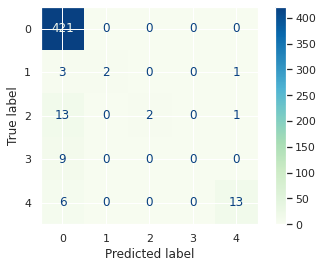

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix base model

print('Classification Report : \n', classification_report(y_train, y_pred_train_log))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_lrc, X_train_final, y_train, cmap='GnBu'))

### Tuning Model

In [ ]:
# Mendefinisikan hyperparameter tuning dari Logistic Regression

param_grid_log = {'clf_lrc__penalty': [None, 'l2'],
                  'clf_lrc__verbose': [10, 15, 20],
                  'clf_lrc__C': [0.1, 1.0, 10, 100],
                  'clf_lrc__multi_class' : ['multinomial']
}

logreg_cv = GridSearchCV(estimator=pipeline_lrc, param_grid=param_grid_log, cv=5, scoring='recall', return_train_score = True)
logreg_cv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf_lrc', LogisticRegression())]),
             param_grid={'clf_lrc__C': [0.1, 1.0, 10, 100],
                         'clf_lrc__multi_class': ['multinomial'],
                         'clf_lrc__penalty': [None, 'l2'],
                         'clf_lrc__verbose': [10, 15, 20]},
             return_train_score=True, scoring='recall')

In [ ]:
# Mencari parameter terbaik
%%time

logreg_cv.fit(X_train_final, y_train)

print("Best params:")
print(logreg_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Best params:
{'clf_lrc__C': 0.1, 'clf_lrc__multi_class': 'multinomial', 'clf_lrc__penalty': None, 'clf_lrc__verbose': 10}
CPU times: user 8.82 s, sys: 1.04 s, total: 9.85 s
Wall time: 23.4 s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Best parameter Logistic Regression `'clf_lrc__C': 0.1, 'clf_lrc__multi_class': 'multinomial', 'clf_lrc__penalty': None, 'clf_lrc__verbose': 10`.

In [ ]:
# Mendefinisikan best logreg_cv dan train & test score final

best_log = logreg_cv.best_estimator_
print('Train Score Log Reg: ', best_log.score(X_train_final, y_train))
print('Test Score Log Reg: ', best_log.score(X_test_final, y_test))

Train Score Log Reg:  0.9787685774946921
Test Score Log Reg:  0.9576271186440678


Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       421
           1       1.00      1.00      1.00         6
           2       0.72      0.81      0.76        16
           3       0.83      0.56      0.67         9
           4       1.00      1.00      1.00        19

    accuracy                           0.98       471
   macro avg       0.91      0.87      0.88       471
weighted avg       0.98      0.98      0.98       471

Confusion Matrix      : 


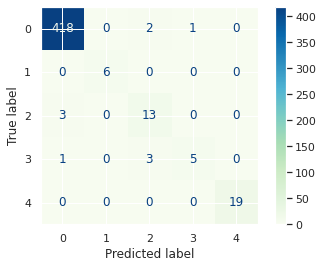

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix setelah tuning

y_pred_train_best = best_log.predict(X_train_final)

print('Classification Report : \n', classification_report(y_train, y_pred_train_best))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_log, X_train_final, y_train, cmap='GnBu'))

Recall - Test Set   :  0.9576271186440678 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00         1
           2       0.60      0.75      0.67         4
           3       0.00      0.00      0.00         3
           4       1.00      0.80      0.89         5

    accuracy                           0.96       118
   macro avg       0.72      0.71      0.71       118
weighted avg       0.94      0.96      0.95       118
 

Confusion Matrix      : 


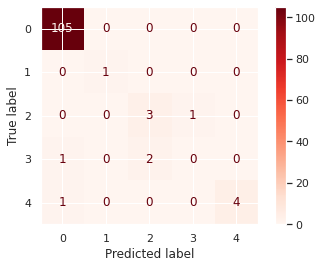

In [ ]:
# Cek model performance menggunakan test terbaik

y_pred_test_best = best_log.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_best, pos_label='positive', average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_log, X_test_final, y_test, cmap='Reds'))

## SVM

### Base Model

In [ ]:
# Mendefinisikan dan evaluasi prediksi y_train dan y_test SVM

y_pred_train_svm = pipeline_svc.predict(X_train_final)
y_pred_test_svm = pipeline_svc.predict(X_test_final)

In [ ]:
# Mendapatkan nilai akurasi train dan test SVM

print('Accuracy Score Train : ',accuracy_score(y_train, y_pred_train_svm))
print('Accuracy Score Test : ',accuracy_score(y_test, y_pred_test_svm))

Accuracy Score Train :  0.9150743099787686
Accuracy Score Test :  0.8983050847457628


In [ ]:
 # Menampilkan kelas pada target
 
 pipeline_svc.classes_

array([0, 1, 2, 3, 4])

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       421
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         9
           4       0.91      0.53      0.67        19

    accuracy                           0.92       471
   macro avg       0.36      0.31      0.32       471
weighted avg       0.85      0.92      0.88       471

Confusion Matrix      : 


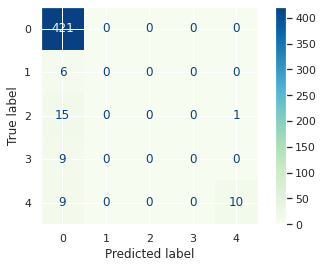

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix base model
print('Classification Report : \n', classification_report(y_train, y_pred_train_svm))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_svc, X_train_final, y_train, cmap='GnBu'))

### Tuning Model

In [ ]:
# Mendefinisikan hyperparameter tuning dari SVM

param_grid_svm = {'clf_svc__C': [0.1, 1.0], 
                  'clf_svc__gamma': ['auto','scale'], 
                  'clf_svc__kernel': ['poly','linear','rbf']}

svm_cv = GridSearchCV(pipeline_svc, param_grid_svm, cv=5, scoring='recall', return_train_score = True)
svm_cv

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf_svc', SVC())]),
             param_grid={'clf_svc__C': [0.1, 1.0],
                         'clf_svc__gamma': ['auto', 'scale'],
                         'clf_svc__kernel': ['poly', 'linear', 'rbf']},
             return_train_score=True, scoring='recall')

In [ ]:
# Mencari parameter terbaik
%%time

svm_cv.fit(X_train_final, y_train)

print("Best params:")
print(svm_cv.best_params_)

Best params:
{'clf_svc__C': 0.1, 'clf_svc__gamma': 'auto', 'clf_svc__kernel': 'poly'}
CPU times: user 598 ms, sys: 75 µs, total: 598 ms
Wall time: 600 ms


Best parameter SVM `'clf_svc__C': 0.1, 'clf_svc__gamma': 'auto', 'clf_svc__kernel': 'poly'`.

In [ ]:
# Mendefinisikan best svm_cv dan train score final

best_svm = svm_cv.best_estimator_
print('Train Score SVM: ', best_svm.score(X_train_final, y_train))
print('Test Score SVM: ', best_svm.score(X_test_final, y_test))

Train Score SVM:  0.8938428874734607
Test Score SVM:  0.8898305084745762


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       421
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        19

    accuracy                           0.89       471
   macro avg       0.18      0.20      0.19       471
weighted avg       0.80      0.89      0.84       471

Confusion Matrix      : 


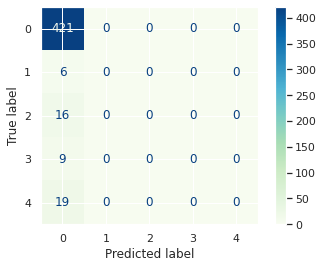

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix setelah tuning

y_pred_train_best_svm = best_svm.predict(X_train_final)

print('Classification Report : \n', classification_report(y_train, y_pred_train_best_svm))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_svm, X_train_final, y_train, cmap='GnBu'))

Recall - Test Set   :  0.8898305084745762 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       105
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5

    accuracy                           0.89       118
   macro avg       0.18      0.20      0.19       118
weighted avg       0.79      0.89      0.84       118
 

Confusion Matrix      : 


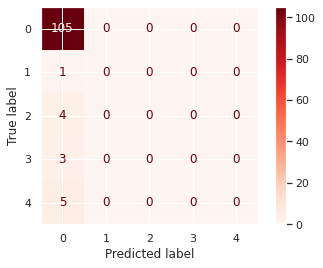

In [ ]:
# Cek model performance menggunakan test terbaik

y_pred_test_best_svm = best_svm.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_best_svm, pos_label='positive', average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_best_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_svm, X_test_final, y_test, cmap='Reds'))

## Random Forest

### Base Model

In [ ]:
# Mendefinisikan dan evaluasi prediksi y_train dan y_test Random Forest

y_pred_train_rfc = pipeline_rfc.predict(X_train_final)
y_pred_test_rfc = pipeline_rfc.predict(X_test_final)

In [ ]:
# Mendapatkan nilai akurasi train dan test Random Forest

print('Accuracy Score Train : ',accuracy_score(y_train, y_pred_train_rfc))
print('Accuracy Score Test : ',accuracy_score(y_test, y_pred_test_rfc))

Accuracy Score Train :  1.0
Accuracy Score Test :  0.9661016949152542


In [ ]:
 # Menampilkan kelas pada target
 
 pipeline_rfc.classes_

array([0, 1, 2, 3, 4])

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        19

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

Confusion Matrix      : 


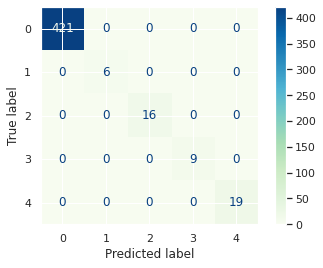

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix base model
print('Classification Report : \n', classification_report(y_train, y_pred_train_rfc))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_rfc, X_train_final, y_train, cmap='GnBu'))

### Tuning Model

In [ ]:
# Mendefinisikan hyperparameter tuning dari Random Forest

param_grid_rfc = {'clf_rfc__n_estimators': [10, 50, 100], 
                  'clf_rfc__criterion': ['gini', 'entropy', 'log_loss'], 
                  'clf_rfc__max_features': ['sqrt', 'log2', None]}

rfc_cv = GridSearchCV(pipeline_rfc, param_grid_rfc, cv=5, scoring='recall', return_train_score = True)
rfc_cv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf_rfc', RandomForestClassifier())]),
             param_grid={'clf_rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'clf_rfc__max_features': ['sqrt', 'log2', None],
                         'clf_rfc__n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='recall')

In [ ]:
# Mencari parameter terbaik
%%time

rfc_cv.fit(X_train_final, y_train)

print("Best params:")
print(rfc_cv.best_params_)

Best params:
{'clf_rfc__criterion': 'gini', 'clf_rfc__max_features': 'sqrt', 'clf_rfc__n_estimators': 10}
CPU times: user 20.8 s, sys: 58.5 ms, total: 20.9 s
Wall time: 21.1 s


Best parameter Random Forest `'clf_rfc__criterion': 'gini', 'clf_rfc__max_features': 'sqrt', 'clf_rfc__n_estimators': 10`.

In [ ]:
# Mendefinisikan best rfc_cv dan train & test score final

best_rfc = rfc_cv.best_estimator_
print('Train Score Random Forest: ', best_rfc.score(X_train_final, y_train))
print('Test Score Random Forest: ', best_rfc.score(X_test_final, y_test))

Train Score Random Forest:  0.9957537154989384
Test Score Random Forest:  0.9491525423728814


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00         6
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        19

    accuracy                           1.00       471
   macro avg       1.00      0.97      0.99       471
weighted avg       1.00      1.00      1.00       471

Confusion Matrix      : 


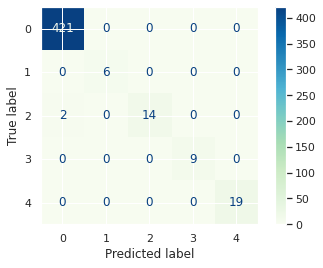

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix setelah tuning

y_pred_train_best_rfc = best_rfc.predict(X_train_final)

print('Classification Report : \n', classification_report(y_train, y_pred_train_best_rfc))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_rfc, X_train_final, y_train, cmap='GnBu'))

Recall - Test Set   :  0.9491525423728814 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         4
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         5

    accuracy                           0.95       118
   macro avg       0.49      0.50      0.50       118
weighted avg       0.92      0.95      0.93       118
 

Confusion Matrix      : 


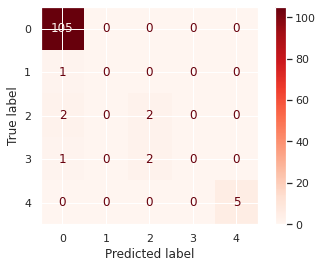

In [ ]:
# Cek model performance menggunakan test terbaik

y_pred_test_best_rfc = best_rfc.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_best_rfc, pos_label='positive', average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_best_rfc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_rfc, X_test_final, y_test, cmap='Reds'))

## Gradient Boosting

### Base Model

In [ ]:
# Mendefinisikan dan evaluasi prediksi y_train dan y_test Gradien Boosting

y_pred_train_gbc = pipeline_gbc.predict(X_train_final)
y_pred_test_gbc = pipeline_gbc.predict(X_test_final)

In [ ]:
# Mendapatkan nilai akurasi train dan test Random Forest

print('Accuracy Score Train : ',accuracy_score(y_train, y_pred_train_gbc))
print('Accuracy Score Test : ',accuracy_score(y_test, y_pred_test_gbc))

Accuracy Score Train :  1.0
Accuracy Score Test :  0.9576271186440678


In [ ]:
 # Menampilkan kelas pada target
 
 pipeline_gbc.classes_

array([0, 1, 2, 3, 4])

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        19

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

Confusion Matrix      : 


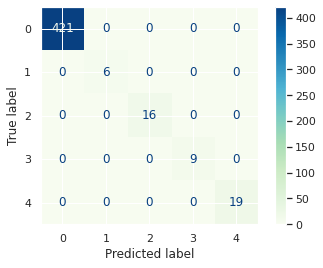

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix base model
print('Classification Report : \n', classification_report(y_train, y_pred_train_gbc))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_gbc, X_train_final, y_train, cmap='GnBu'))

### Tuning Model

In [ ]:
# Mendefinisikan hyperparameter tuning dari Gradient Boosting

param_grid_gbc = {'clf_gbc__n_estimators': [10, 50, 100], 
                  'clf_gbc__criterion': ['friedman_mse', 'squared_error'], 
                  'clf_gbc__max_features': ['auto', 'sqrt', 'log2']}

gbc_cv = GridSearchCV(pipeline_gbc, param_grid_gbc, cv=5, scoring='recall', return_train_score = True)
gbc_cv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf_gbc',
                                        GradientBoostingClassifier())]),
             param_grid={'clf_gbc__criterion': ['friedman_mse',
                                                'squared_error'],
                         'clf_gbc__max_features': ['auto', 'sqrt', 'log2'],
                         'clf_gbc__n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='recall')

In [ ]:
# Mencari parameter terbaik
%%time

gbc_cv.fit(X_train_final, y_train)

print("Best params:")
print(gbc_cv.best_params_)

Best params:
{'clf_gbc__criterion': 'friedman_mse', 'clf_gbc__max_features': 'auto', 'clf_gbc__n_estimators': 10}
CPU times: user 38.4 s, sys: 35.9 ms, total: 38.4 s
Wall time: 38.8 s


Best Parameter `'clf_gbc__criterion': 'friedman_mse', 'clf_gbc__max_features': 'auto', 'clf_gbc__n_estimators': 10`.

In [ ]:
# Mendefinisikan best gbc_cv dan train & test score final

best_gbc = gbc_cv.best_estimator_
print('Train Score Gradient Boosting: ', best_gbc.score(X_train_final, y_train))
print('Test Score Gradient Boosting: ', best_gbc.score(X_test_final, y_test))

Train Score Gradient Boosting:  0.9915074309978769
Test Score Gradient Boosting:  0.9576271186440678


Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       421
           1       1.00      1.00      1.00         6
           2       1.00      0.88      0.93        16
           3       1.00      0.89      0.94         9
           4       1.00      0.95      0.97        19

    accuracy                           0.99       471
   macro avg       1.00      0.94      0.97       471
weighted avg       0.99      0.99      0.99       471

Confusion Matrix      : 


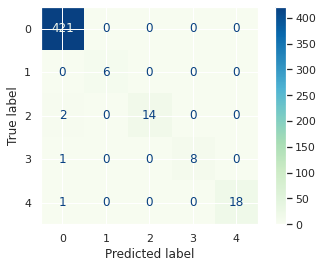

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix setelah tuning

y_pred_train_best_gbc = best_gbc.predict(X_train_final)

print('Classification Report : \n', classification_report(y_train, y_pred_train_best_gbc))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_gbc, X_train_final, y_train, cmap='GnBu'))

Recall - Test Set   :  0.9576271186440678 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00         1
           2       0.67      0.50      0.57         4
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         5

    accuracy                           0.96       118
   macro avg       0.73      0.70      0.71       118
weighted avg       0.95      0.96      0.95       118
 

Confusion Matrix      : 


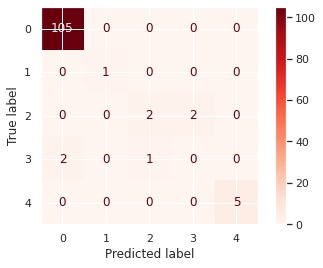

In [ ]:
# Cek model performance menggunakan test terbaik

y_pred_test_best_gbc = best_gbc.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_best_gbc, pos_label='positive', average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_best_gbc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_gbc, X_test_final, y_test, cmap='Reds'))

## Best Model

In [ ]:
# Menampilkan Accuracy Score pada Baseline Model (Pipeline)

all_reports = {}
score_reports = {
    'Accuracy Score Train Log' : accuracy_score(y_train, y_pred_train_log),
    'Accuracy Score Test Log' : accuracy_score(y_test, y_pred_test_log),
    'Accuracy Score Train SVM' : accuracy_score(y_train, y_pred_train_svm),
    'Accuracy Score Test SVM' : accuracy_score(y_test, y_pred_test_svm),
    'Accuracy Score Train Random Forest' : accuracy_score(y_train, y_pred_train_rfc),
    'Accuracy Score Test Random Forest' : accuracy_score(y_test, y_pred_test_rfc),
    'Accuracy Score Train Gradient Boosting' : accuracy_score(y_train, y_pred_train_gbc),
    'Accuracy Score Test Gradient Boosting' : accuracy_score(y_test, y_pred_test_gbc),
}
all_reports['Baseline Pipeline'] = score_reports
pd.DataFrame(all_reports)

,Baseline Pipeline
Accuracy Score Test Gradient Boosting,0.957627
Accuracy Score Test Log,0.923729
Accuracy Score Test Random Forest,0.966102
Accuracy Score Test SVM,0.898305
Accuracy Score Train Gradient Boosting,1.000000
Accuracy Score Train Log,0.929936
Accuracy Score Train Random Forest,1.000000
Accuracy Score Train SVM,0.915074


In [ ]:
# Membandingkan Accuracy Score antara Baseline dan After Tuning

score_reports = {
    'Accuracy Score Train Log' : best_log.score(X_train_final, y_train),
    'Accuracy Score Test Log' : best_log.score(X_test_final, y_test),
    'Accuracy Score Train SVM' : best_svm.score(X_train_final, y_train),
    'Accuracy Score Test SVM' : best_svm.score(X_test_final, y_test),
    'Accuracy Score Train Random Forest' : best_rfc.score(X_train_final, y_train),
    'Accuracy Score Test Random Forest' : best_rfc.score(X_test_final, y_test),
    'Accuracy Score Train Gradient Boosting' : best_gbc.score(X_train_final, y_train),
    'Accuracy Score Test Gradient Boosting' : best_gbc.score(X_test_final, y_test),
}
all_reports['After Tuning'] = score_reports
pd.DataFrame(all_reports)

,Baseline Pipeline,After Tuning
Accuracy Score Train Log,0.929936,0.978769
Accuracy Score Test Log,0.923729,0.957627
Accuracy Score Train SVM,0.915074,0.893843
Accuracy Score Test SVM,0.898305,0.889831
Accuracy Score Train Random Forest,1.000000,0.995754
Accuracy Score Test Random Forest,0.966102,0.949153
Accuracy Score Train Gradient Boosting,1.000000,0.991507
Accuracy Score Test Gradient Boosting,0.957627,0.957627


In [ ]:
# Menampilkan recall score after tuning

print('Recall - Test Set Log Reg  : ', recall_score(y_test, y_pred_test_best, pos_label='positive', average='micro'), '\n')
print('Recall - Test Set SVM : ', recall_score(y_test, y_pred_test_best_svm, pos_label='positive', average='micro'), '\n')
print('Recall - Test Set Random Forest : ', recall_score(y_test, y_pred_test_best_rfc, pos_label='positive', average='micro'), '\n')
print('Recall - Test Set Gradient Boosting : ', recall_score(y_test, y_pred_test_best_gbc, pos_label='positive', average='micro'), '\n')

Recall - Test Set Log Reg  :  0.9576271186440678 

Recall - Test Set SVM :  0.8898305084745762 

Recall - Test Set Random Forest :  0.9491525423728814 

Recall - Test Set Gradient Boosting :  0.9576271186440678 



Berdasarkan hasil di atas, `Logistic Regression` setelah tuning adalah `best model` karena melihat dari Train dan Test-Set Score yang memiliki nilai tertinggi sebesar `97%` dan `95%`. Hasil model terbaik ini dapat dikatakan `goodfit` karena selisihnya kecil antara Train dan Test. Serta `Recall Score After Tuning` pada Logistic Regression yang memiliki nilai tertinggi dibanding model lainnya, yaitu sebesar `96%`.

Berikut adalah hasil uji Train dan Test-Set pada Logistic Regression setelah tuning.

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       421
           1       1.00      1.00      1.00         6
           2       0.72      0.81      0.76        16
           3       0.83      0.56      0.67         9
           4       1.00      1.00      1.00        19

    accuracy                           0.98       471
   macro avg       0.91      0.87      0.88       471
weighted avg       0.98      0.98      0.98       471

Confusion Matrix      : 


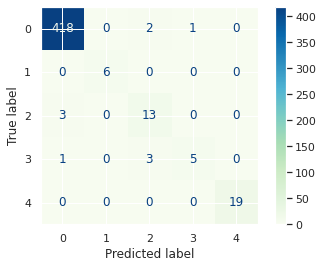

In [ ]:
# Menampilkan data Train Set Classification Report dan Confusion Matrix setelah tuning

y_pred_train_best = best_log.predict(X_train_final)

print('Classification Report : \n', classification_report(y_train, y_pred_train_best))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_log, X_train_final, y_train, cmap='GnBu'))

Berdasarkan hasil `Confusion Matrix Train After Tuning` di atas, dapat diketahui bahwa:
- Terdapat `418` pasien yang aktualnya adalah `pasien sehat (0)` dan diprediksi sebagai `benar-benar pasien yang sehat (0)`. TP
- Terdapat `2` pasien yang aktualnya adalah `pasien sehat (0)`, namun terprediksi sebagai `pasien sakit Hepatitis (2)`. FP
- Terdapat `1` pasien yang aktualnya adalah `pasien sehat (0)`, namun terprediksi sebagai `pasien hepatitis tahap fibrosis (3)`. FP
- Terdapat `6` pasien yang aktualnya adalah `pasien suspek (1)` dan diprediksi sebagai `benar-benar pasien suspek (1)`. TP
- Terdapat `3` pasien yang aktualnya adalah `pasien sakit Hepatitis (2)`, namun terprediksi sebagai `pasien sehat (0)`. **FN**
- Terdapat `13` pasien yang aktualnya adalah `pasien sakit Hepatitis (2)` dan diprediksi sebagai `benar-benar pasien yang sakit Hepatitis (2)`. TP
- Terdapat `1` pasien yang aktualnya adalah `pasien hepatitis tahap fibrosis (3)`, namun terprediksi sebagai `pasien sehat (0)`. **FN**
- Terdapat `5` pasien yang aktualnya adalah `pasien hepatitis tahap fibrosis (3)` dan benar-benar terprediksi demikian. TP
- Terdapat `3` pasien yang aktualnya adalah `pasien hepatitis tahap fibrosis (3)`, namun terprediksi sebagai `pasien sakit Hepatitis (2)`. **FN**
- Terdapat `19` pasien yang aktualnya adalah `pasien hepatitis tahap sirosis (4)` dan benar-benar terprediksi demikian. TN

Berdasarkan uji `Train-Set` di atas, terdapat `False Negative sebanyak 3+1+3 = 7` pasien dengan tahapan sakit hepatitis yang berbeda-beda. Hal ini harus ditekan karena dapat membahayakan nyawa pasien.

Recall - Test Set   :  0.9576271186440678 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00         1
           2       0.60      0.75      0.67         4
           3       0.00      0.00      0.00         3
           4       1.00      0.80      0.89         5

    accuracy                           0.96       118
   macro avg       0.72      0.71      0.71       118
weighted avg       0.94      0.96      0.95       118
 

Confusion Matrix      : 


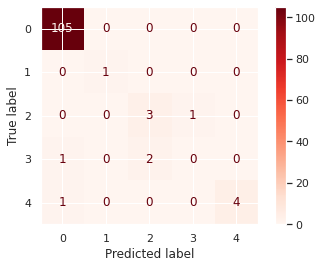

In [ ]:
# Cek model performance menggunakan test terbaik

y_pred_test_best = best_log.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_best, pos_label='positive', average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_log, X_test_final, y_test, cmap='Reds'))

Berdasarkan hasil `Confusion Matrix Test After Tuning` di atas, dapat diketahui bahwa:

- `105` pasien yang aktualnya adalah `pasien sehat (0)` dan benar-benar terprediksi demikian. TP
- `1` pasien yang aktualnya adalah `pasien suspek (1)` dan benar-benar terprediksi demikian. TP
- `3` pasien yang aktualnya adalah `pasien sakit Hepatitis (2)` dan benar-benar terprediksi demikian. TP
- `1` pasien yang aktualnya adalah `pasien sakit Hepatitis (2)`, namun terprediksi sebagai `pasien hepatitis tahap Fibrosis (3)`. FP
- `1` pasien yang aktualnya adalah `pasien hepatitis tahap Fibrosis (3)`, namun terprediksi sebagai `pasien sehat (0)`. **FN**
- `2` pasien yang aktualnya adalah `pasien hepatitis tahap Fibrosis (3)`, namun terprediksi sebagai `pasien sakit Hepatitis (2)`. **FN**
- `1` pasien yang aktualnya adalah `pasien hepatitis tahap Sirosis (4)`, namun terprediksi sebagai `pasien sehat (0)`. **FN**
- `4` pasien yang aktualnya adalah `pasien hepatitis tahap Sirosis (4)` dan benar-benar terprediksi demikian.

Berdasarkan uji `Test-Set` di atas, pasien yang salah diagnosis dan menyebabkan bahaya adalah `False Negative sebanyak 1+2+1 = 4`. Dibandingkan dengan uji model dan uji coba, maka prediksi menggunakan best model Logistic Linear dengan Recall Score sebesar 96%, dapat memprediksi False Negative sebanyak 4. Ini adalah angka yang cukup bagus untuk menekan angka kematian dan salah treatment akibat penyakit Hepatitis B.

In [ ]:
# Mendefinisikan pipeline model terbaik untuk saving
# scaling dan encoding
# best model = model logistic regression setelah tuning

pipelines = Pipeline([('prepp', prepo_pipeline),
                      ('model', best_log)
                     ])
pipelines.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Pipeline(steps=[('prepp',
                 ColumnTransformer(transformers=[('mms_scaler', MinMaxScaler(),
                                                  ['ALB', 'ALP', 'ALT', 'AST',
                                                   'BIL', 'CHE', 'CREA', 'GGT',
                                                   'PROT']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'CHOL']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Sex'])])),
                ('model',
                 Pipeline(steps=[('clf_lrc',
                                  LogisticRegression(C=0.1,
                                                     multi_class='multinomial',
                                                     penalty=None,
                                                     verbose=10))]))])

## Kesimpulan Model Evaluation

1. Model yang digunakan adalah 4, yaitu Logistik Regression, SVM, Random Forest, dan Gradient Boosting. Masing-masing dilakukan hyperparameter tuning dengan pipeline sesudah diuji dengan pipeline base model.
2. Pada `baseline pipeline` didapatkan model terbaik adalah `Logistic Regression` dengan Train dan Test-Set Score tidak berbeda jauh, yaitu sebesar 0.929936 pada Train dan 0.923729 pada Test.
3. Setelah masing-masing dilakukan `hyperparameter tuning`, didapatkan bahwa `Logistic Regression` adalah model terbaik dengan best parameter menggunakan `'clf_lrc__C': 0.1, 'clf_lrc__multi_class': 'multinomial', 'clf_lrc__penalty': None, 'clf_lrc__verbose': 10`, memiliki Train dan Test-Set Score sebesar 0.978769 dan 0.957627. Angka ini adalah nilai tertinggi dibanding model lainnya dan selisihnya sedikit.
4. Melihat hasil dari `Recall Score`, Logistic Regression juga memiliki skor tertinggi yaitu `96%`. Pemilihan recall score tertinggi, dimaksudkan untuk menekan angka `False Negative` pada prediksi dataset.
5. Hal ini dibuktikan dengan Uji Test Set, didapatkan `False Negative` hanya sebanyak 4 pasien, yaitu error hanya 4%.

# ix. Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [ ]:
# Saving files 

import pickle
import json

with open('pipelines.pkl', 'wb') as file_1:
  pickle.dump(pipelines, file_1)

with open('num_columns.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

with open('cat_columns.txt', 'w') as file_3:
  json.dump(cat_columns, file_3)

with open('norm_columns.txt', 'w') as file_4:
  json.dump(norm_columns, file_4)

with open('skew_columns.txt', 'w') as file_5:
  json.dump(skew_columns, file_5)

with open('enc_columns.txt', 'w') as file_6:
  json.dump(enc_columns, file_6)

In [ ]:
# Menampilkan X_train untuk inference

X_train

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
149,46,m,39.7,40.3,14.6,22.3,5.3,6.30,4.66,71.0,11.7,67.2
466,52,f,36.0,47.2,19.6,22.5,5.9,7.85,5.69,85.0,30.4,69.2
503,57,f,37.9,50.3,12.2,18.1,3.5,6.72,5.06,71.0,10.0,69.3
327,33,f,38.2,54.4,17.3,21.2,7.1,8.67,5.69,68.0,32.1,66.9
389,44,f,45.6,57.6,21.0,19.1,3.7,10.36,6.68,74.0,20.8,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...
322,33,f,36.0,77.5,14.8,22.0,4.4,8.61,5.26,66.0,13.1,66.1
93,40,m,44.5,45.7,25.9,27.6,9.2,8.93,4.49,87.0,17.0,71.2
133,44,m,44.0,84.3,47.4,31.3,4.1,10.28,5.42,105.0,34.2,75.3
324,33,f,44.3,74.0,49.7,52.3,8.5,6.49,3.34,73.0,44.7,73.8


# x. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini dalam format yang asli, bukan data yang sudah di-scaled.

Model Inference dapat dilihat [di sini](https://colab.research.google.com/drive/10BFDzBk2zEXLa8IbPQqImXcJBZsLkseq?usp=sharing).

# xi. Pengambilan Kesimpulan

> Bab ini berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.



## Model Analysis

1. Model terbaik yang didapatkan untuk memprediksi penyakit Hepatitis C (multiclass data) adalah menggunakan algoritma `Logistic Regression` dengan best parameter `clf_lrc__C': 0.1, 'clf_lrc__multi_class': 'multinomial', 'clf_lrc__penalty': None, 'clf_lrc__verbose': 10`. Uji ini berhasil memperoleh Train Score 97% dan Test Score 95%. Ini membuktikan bahwa model ini adalah `goodfit`.
2. `Recall Score pada Logistic Regression after tuning adalah 96%`. Angka ini mampu menekan False Negative pada data uji, yaitu prediksinya berhasil mencapai hanya 4 pasien yang salah prediksi, yaitu sakit diprediksi sehat atau satu tingkat di bawah (stadium hepatitis).
3. Perlakuan hingga mendapat model terbaik adalah dilakukan dengan metode `pipeline` mulai dari scaling (MinMaxScaler dan StandardScaler), encoding (OneHotEncoder), sampai model evaluation (hyperparameter tuning). Hal ini dapat membantu modeling menjadi cepat dan praktis.

## Overall Analysis

1. Label pada penyakit hepatitis ini adalah `0: Sehat, 1: Suspek, 2: Hepatitis, 3: Fibrosis, 4: Sirosis`.
2. Persebaran data pasien antara yang sehat dan yang sakit adalah `imbalanced`, sehingga tujuan dalam modeling klasifikasi ini adalah berfokus pada `Recall Score` di mana merepresentasikan kejadian yang salah namun diprediksi benar. Hal ini karena dapat membahayakan sebuah pihak/individu/perusahaan.
3. Pasien yang terserang Hepatitis C mayoritas adalah laki-laki dan umur antara 50-59 tahun. Di mana penderita terbanyak adalah sudah memasuki tahap Sirosis (`4`).
4. Berdasarkan heatmap correlation, diagnosis Hepatitis C ini memiliki hubungan erat dengan `AST, BIL, dan GGT` skor > 45%. Hal ini dibuktikan dengan literatur bahwa, meningkatnya kadar `ALT, BIL, dan GGT` di atas normal, mengindikasikan keparahan kerusakan hati (liver). Sedangkan, kolom yang berkorelasi negatif paling besar dengan diagnosa (`Category`) adalah `CHE` karena semakin rendahnya kadar CHE, makan semakin memperburuk kondisi hati. Mengindikasikan penyakit hepatitis semakin parah. 
5. Berdasarkan analisis statistik deskriptif, rata-rata kadar albumin dan protein adalah juga bisa menjadi indikator dalam menentukan tahap penyakit Hepatitis C. Semakin rendah kadar albumin dan protein, maka pasien tersebut berisiko tinggi terkena Hepatitis. 

## Implementasi Bisnis

1. Pasien yang sakit namun diprediksi sehat atau pasien yang sudah masuk stadium 2 Hepatitis (Sirosis) namun diprediksi masih stadium 1 (Fibrosis) adalah hal yang berbahaya karena dapat memberikan treatment yang salah kepada pasien dan dapat menimbulkan kematian jika tidak mendapat penanganan khusus.
2. Modeling terbaik ini menghasilkan kesalahan sejumlah 4 pasien, ini dapat dilakukan implementasi oleh Rumah Sakit Liver untuk memonitoring kembali pasien tersebut. Sehingga pasien dapat mendapat pelayanan yang baik dan mengurangi risiko kematian.
3. Prediksi penyakit ini dapat digunakan oleh pihak Rumah Sakit atau fasilitas kesehatan lainnya dalam memonitoring pasien agar mendapat perawatan yang terbaik, memperbaiki mutu rumah sakit, dan digunakan sebagai studi jika ada suatu kasus baru.
4. Kelemahan prediksi ini adalah terkadang kurang representatif karena data pasien terbatas.

## Model Improvement

1. Model ini dapat ditingkatkan kembali untuk mencari model prediksi terbaik dengan cara menambah variabel dalam hyperparamater tuning dari setiap model.
2. Dari 4 model yang sudah dibuat pada analisis dan modeling ini, ke depannya dapat ditambahkan algoritma lain seperti Decision Tree serta KNN karena juga cocok digunakan pada multiclass data.